In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv("./data/car_price_data.csv")

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
features=["Make","Model","Year","Engine HP","Engine Cylinders","Transmission Type","Vehicle Style","highway MPG","city mpg","MSRP"]

In [8]:
df[features].head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [9]:
df_2=df[features]

In [10]:
df_2.columns = df_2.columns.str.replace(' ', '_').str.lower()

In [11]:
df_2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [12]:
df_2.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [13]:
df_2=df_2.fillna(0)

In [14]:
df_2.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [15]:
df_2.rename(columns={'msrp': 'price'}, inplace=True)

In [16]:
df_2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [17]:
#QUESTION 1

In [18]:
df_2.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [19]:
#QUESTION 2

In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [21]:
numerical=["year","engine_hp","engine_cylinders","highway_mpg","city_mpg"]

In [22]:
corr_matrix=df_2[numerical].corr()

In [23]:
print(corr_matrix)

                      year  engine_hp  engine_cylinders  highway_mpg  city_mpg
year              1.000000   0.338714         -0.040708     0.258240  0.198171
engine_hp         0.338714   1.000000          0.774851    -0.415707 -0.424918
engine_cylinders -0.040708   0.774851          1.000000    -0.614541 -0.587306
highway_mpg       0.258240  -0.415707         -0.614541     1.000000  0.886829
city_mpg          0.198171  -0.424918         -0.587306     0.886829  1.000000


In [24]:
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Axes: >

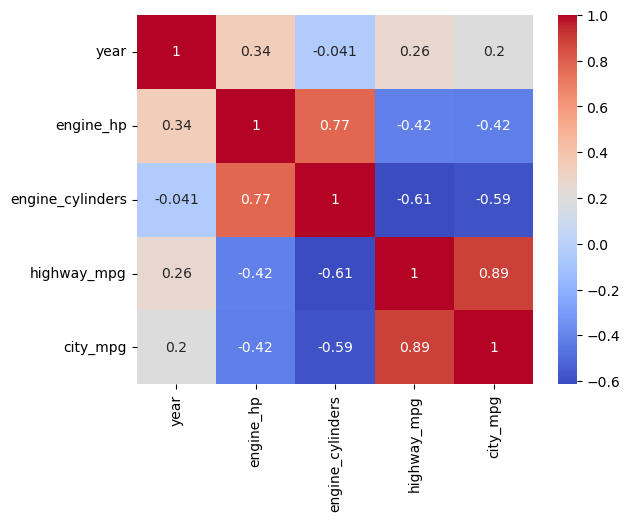

In [25]:
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

In [26]:
#so highway_mpg and city_mpg are the most correlated features

In [27]:
mean_price = df_2['price'].mean()

In [28]:
mean_price

40594.737032063116

In [29]:
def is_above_mean(price):
    if price>mean_price:
        return 1
    else:
        return 0

In [30]:
df_2["above_average"]=df_2["price"].apply(is_above_mean)

In [31]:
df_2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [32]:
del df_2["price"]

In [33]:
df_2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df_full_train, df_test = train_test_split(df_2, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [36]:
df_2.shape

(11914, 10)

In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [39]:
del df_train["above_average"]
del df_val["above_average"]
del df_test["above_average"]

In [40]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


In [41]:
df_train.shape

(7148, 9)

In [42]:
#QUESTION 3

In [43]:
categorical=["make","model","transmission_type","vehicle_style"]

In [44]:
from sklearn.metrics import mutual_info_score

In [45]:
def mutual_info_above_average_score(series):
    return mutual_info_score(series, y_train)

In [102]:
mi = df_train[categorical].apply(mutual_info_above_average_score)
round(mi, 2).sort_values(ascending=False)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

In [47]:
#transmission_type has the lowest mutual info score

In [48]:
# QUESTION 4

In [49]:
#I apply one-hot encoding to categorical features in the train set

In [50]:
from sklearn.feature_extraction import DictVectorizer

In [51]:
dv = DictVectorizer(sparse=False)

In [52]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [53]:
len(X_train[0])#number of columns

943

In [54]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [55]:
#now I train a logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [58]:
len(model.coef_[0].round(3))

943

In [59]:
y_pred = model.predict_proba(X_val)[:, 1]

In [60]:
y_pred

array([1.70795257e-03, 9.95259390e-01, 1.71077306e-04, ...,
       7.32284249e-04, 9.89595317e-01, 9.82355228e-01])

In [61]:
above_average_decision = (y_pred >= 0.5)

In [62]:
above_average_decision 

array([False,  True, False, ..., False,  True,  True])

In [63]:
y_val

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [64]:
y_val[0:3]==above_average_decision[0:3]

array([ True,  True,  True])

In [65]:
round((y_val == above_average_decision).mean(), 2)

0.95

In [66]:
accuracy=(y_val == above_average_decision).mean()

In [67]:
#this last value is the accuracy of my model

In [68]:
# QUESTION 5: feature elimination technique to find the least useful feature

In [69]:
for c in df_train.columns:
    print(f"deleted column: {c}")
    
    df_train_elimination=df_train.drop(c, axis=1)
    df_val_elimination=df_val.drop(c, axis=1)
    
    dv_elimination = DictVectorizer(sparse=False)
    
    train_elimination_dict = df_train_elimination.to_dict(orient='records')
    #print(len(train_elimination_dict[0]))#8(cols)
    X_elimination_train = dv_elimination.fit_transform(train_elimination_dict)
    #print(len(X_elimination_train[0]))# iteracion a iteracion varian las col pero son iguales a X_elimination_val[0]
    
    val_elimination_dict = df_val_elimination.to_dict(orient='records')
    #print(len(val_elimination_dict[0]))#8(8 cols)
    X_elimination_val = dv_elimination.transform(val_elimination_dict)
    #print(len(X_elimination_val[0]))# iteracion a iteracion varian las col pero son iguales a X_elimination_train[0]
    
    model_2 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model_2.fit(X_elimination_train, y_train)
    
    y_elimination_pred = model_2.predict_proba(X_elimination_val)[:, 1]
    target_decision = (y_elimination_pred >= 0.5)
    
    accuracy_current_model=(y_val == target_decision).mean()
    accuracy_difference=accuracy-accuracy_current_model
    print(f"accuracy difference with original model: {accuracy_difference}")

deleted column: make
accuracy difference with original model: -0.0004196391103650221
deleted column: model
accuracy difference with original model: 0.0264372639530005
deleted column: year
accuracy difference with original model: -0.0020981955518254436
deleted column: engine_hp
accuracy difference with original model: 0.022240872849349613
deleted column: engine_cylinders
accuracy difference with original model: -0.0012589173310951773
deleted column: transmission_type
accuracy difference with original model: 0.0008392782207301552
deleted column: vehicle_style
accuracy difference with original model: 0.003357112882920732
deleted column: highway_mpg
accuracy difference with original model: 0.003776751993285754
deleted column: city_mpg
accuracy difference with original model: -0.0004196391103650221


In [70]:
# the features that have the smallest difference are "city_mpg" and "make" with -0.0004196391103650221 accuracy difference

In [71]:
#QUESTION 6

In [72]:
df_3=df_2.copy()

In [73]:
df_3.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [74]:
df_3["price"]=df["MSRP"]

In [75]:
df_3=df_3.drop(['above_average'], axis=1)

In [76]:
df_3.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [77]:
df_full_train_3, df_test_3 = train_test_split(df_3, test_size=0.2, random_state=42)
df_train_3, df_val_3 = train_test_split(df_full_train_3, test_size=0.25, random_state=42)

In [78]:
df_train_3 = df_train_3.reset_index(drop=True)
df_val_3 = df_val_3.reset_index(drop=True)
df_test_3 = df_test_3.reset_index(drop=True)

In [79]:
y_train_3 =np.log1p(df_train_3.price.values)
y_val_3 = np.log1p(df_val_3.price.values)
y_test_3 = np.log1p(df_test_3.price.values)

In [80]:
del df_train_3["price"]
del df_val_3["price"]
del df_test_3["price"]

In [81]:
from sklearn.linear_model import Ridge

In [92]:
ridge_regression_model = Ridge(solver='sag',alpha=1,random_state=42)#[0, 0.01, 0.1, 1, 10]

In [93]:
dv_3 = DictVectorizer(sparse=False)

In [94]:
train_dict_3 = df_train_3.to_dict(orient='records')
X_train_3 = dv_3.fit_transform(train_dict_3)

In [111]:
val_dict_3 = df_val_3.to_dict(orient='records')
X_val_3 = dv_3.transform(val_dict_3)

In [112]:
ridge_regression_model.fit(X_train_3, y_train_3)

C:\Users\marti\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=1, random_state=42, solver='sag')

In [113]:
y_pred_3 = ridge_regression_model.predict(X_val_3)#[:, 1]

In [114]:
y_pred_3

array([10.23167637, 11.00730042,  9.220971  , ...,  9.03689427,
       11.54584144, 10.84856016])

In [115]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [116]:
rmse(y_val_3, y_pred_3)

0.48681817454327325

In [91]:
#when alpha=0 => rmse=0.487
#when alpha=0.01 => rmse=0.487
#when alpha=0.1 => rmse=0.487
#when alpha=1 => rmse=0.487
#when alpha=10 => rmse=0.487
